In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time

class TransformData:
    
    def __init__(self, data, cat_cols):
        
        self.record = data.loc[:, cat_cols]
        
        self.record_size = data.shape[0]
        
        self.count_range = np.arange(1, self.record_size+1)
        
        self.transformation_time = None
        
    def get_n(self, values, req_value):

        tot_len = sum(values)

        sums = count = 0

        lenn = len(values)

        while tot_len - sums >= req_value:

            sums = sum(values[:count+1])

            count+=1

        return count-1

    def get_req_items(self, counts_map, req_percentile):

        inc_values = sorted(list(counts_map.values()))

        n_count = self.get_n(inc_values, req_percentile)

        sorted_dict = dict(sorted(counts_map.items(), key = lambda x: x[1])[n_count : ])

        return list(sorted_dict.keys())

    def transform_minor_players(self, x):
        
        if x.nunique() <= 20:
            
            return x

        counts_map = x.value_counts().to_dict()

        req_percentile = int(np.percentile(self.count_range, 90))

        req_items = self.get_req_items(counts_map, req_percentile)
        
        x = x.apply(lambda x: x if x in req_items else "others")
        
        return x
    
    def transform_categorical(self):
        
        start_time = time.time()
        
        self.record = self.record.apply(self.transform_minor_players)
        
        end_time = time.time()
        
        self.transformation_time = end_time - start_time
        
        return self.record
    
    def provide_stats_(self):
        
        print("record_size\t:\t", self.record_size)
        
        print("transformation_time\t:\t", self.transformation_time)

In [3]:
df = pd.read_csv("/Users/arjun-14756/Desktop/play/payments_features_filled.csv")

In [4]:
df.head()

,Unnamed: 0,CUSTOMER_ID,SUBSCRIBER_STATUS,EXPIRY_DATE,LAST_TRANSACTION_DATE,VALIDITY,BALANCE_IN_RS,DATA_LIMIT,BANDWIDTH,SRVC_START_DATE,LATEST_PRODUCT,Current_Grace_Status,Grace_Start_Date,Grace_Start_Date.1,Current_Plan_StartDate
0,0,C2100009303,Terminated,2017-02-27 23:59:59,2018-03-23 11:29:03,Monthly,0.00,50 GB,10 Mbps,2016-11-04 18:30:48,50 GB Monthly,No,NaN,NaN,2017-01-29 00:00:00
1,1,C2100009313,Deactivated,2018-05-06 23:59:59,2018-08-17 08:10:06,Monthly,0.02,1000 GB,50 Mbps,2016-11-03 18:01:32,Unlimited Monthly Mar17,No,NaN,NaN,2018-04-07 00:00:00
2,2,C2100009325,Terminated,2020-02-02 23:59:59,2019-07-06 17:36:50,Seven Months,0.21,60 GB,10 Mbps,2016-11-10 15:56:33,60 GB_BH_7M_Aug18,No,NaN,NaN,2019-07-08 00:00:00
3,3,C2100009335,Terminated,2018-03-31 23:59:59,2018-08-17 08:10:45,Monthly,0.06,50 GB,50 Mbps,2016-11-14 15:40:50,50 GB Demo Plan AWHO,No,NaN,NaN,2018-03-18 00:00:00
4,4,C2100009342,Deactivated,2018-09-29 23:59:59,2018-09-30 17:19:15,Monthly,200.10,60 GB,10 Mbps,2016-11-09 00:00:00,60 GB_BH_1M_Aug18,No,NaN,NaN,2018-08-31 00:00:00


In [5]:
cat = ["SUBSCRIBER_STATUS", "VALIDITY", "DATA_LIMIT", "BANDWIDTH", "LATEST_PRODUCT", "Current_Grace_Status"]

newdf = df.dropna()
newdf.drop("Unnamed: 0", axis=1, inplace=True)

/var/folders/j6/frt381rd1c11cs1fzwmd2zd04sv38d/T/ipykernel_18077/659985167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop("Unnamed: 0", axis=1, inplace=True)


In [6]:
td = TransformData(newdf, cat)
newdf_transformed = td.transform_categorical()

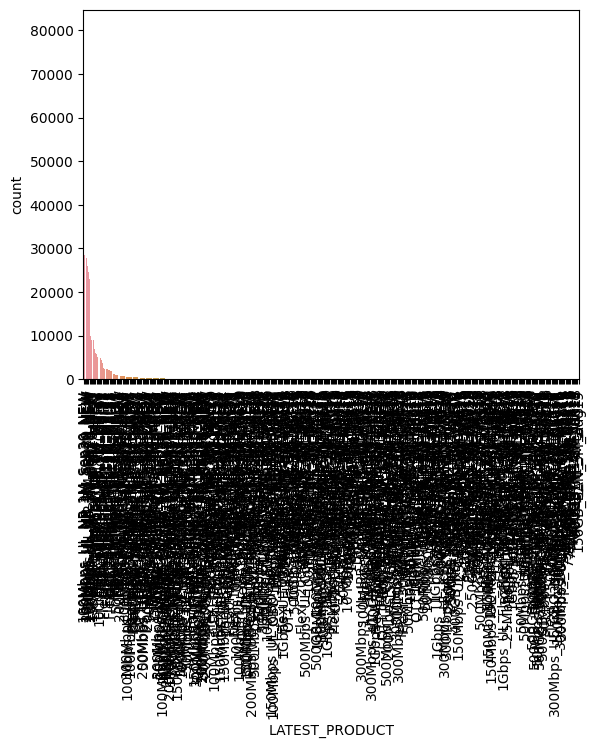

In [7]:
tt = pd.DataFrame(newdf["LATEST_PRODUCT"]).value_counts().reset_index()
sub_status = sns.barplot(x=tt["LATEST_PRODUCT"], y=tt["count"])
sub_status.set_xticklabels(labels=tt["LATEST_PRODUCT"], rotation=90)

plt.show()

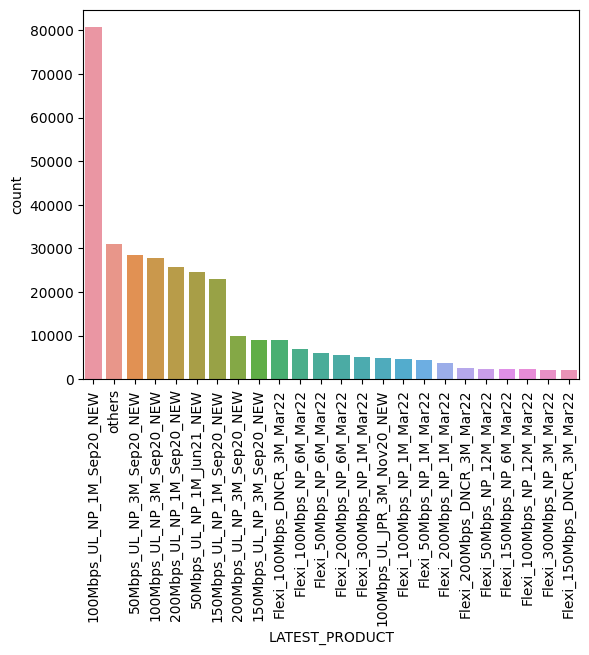

In [8]:
tt = pd.DataFrame(newdf_transformed["LATEST_PRODUCT"].value_counts()).reset_index()
sub_status = sns.barplot(x=tt["LATEST_PRODUCT"], y=tt["count"])
sub_status.set_xticklabels(labels=tt["LATEST_PRODUCT"], rotation=90)
plt.show()

In [9]:
newdf_transformed["LATEST_PRODUCT"].nunique()

24

In [10]:
newdf["LATEST_PRODUCT"].nunique()

422

In [11]:
comp_df = pd.read_csv("/Users/arjun-14756/Downloads/complaint_data.csv")

/var/folders/j6/frt381rd1c11cs1fzwmd2zd04sv38d/T/ipykernel_18077/3674961398.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  comp_df = pd.read_csv("/Users/arjun-14756/Downloads/complaint_data.csv")


In [12]:
comp_df.head()

,CUSTOMER_ID,ITEM_CATG_DESC,ITEM_TYPE_DESC,ITEM_SUB_TYPE_DESC,created_date,ITEM_STATUS,ACTION,ITEM_ASSIGNED_TO_DATE,ROOT_CAUSE_DESC,REASON_CODE
0,C2104633594,complaint,technical,no connectivity,2022-09-01 00:01:44,Closed,resolved_on_call,2022-09-01 12:38:31,no problem found,facing issue at the time of ticket raised
1,C2104565215,complaint,technical,frequent disconnection,2022-09-01 00:02:24,Closed,resolved_on_call,2022-09-01 10:49:11,cpe or ont related issues,ont reset and reconfigured
2,C2104069553,complaint,recharge,amount not reflecting,2022-09-01 00:02:43,Closed,closed,2022-09-02 09:16:57,no fault found,customer educated/informed
3,C2104381668,complaint,technical,speed issue,2022-09-01 00:07:44,Closed,resolved_on_call,2022-09-01 11:50:27,customer own issues,customer not responding/not contactable
4,C2103756079,complaint,technical,speed issue,2022-09-01 00:08:01,Closed,resolved,2022-09-01 12:25:30,other issues,society entry issue


In [13]:
comp_df["REASON_CODE"].nunique()

361

In [14]:
comp_df.dropna(inplace=True)

In [15]:
cat_cols = ["ITEM_CATG_DESC", "ITEM_TYPE_DESC", "ITEM_SUB_TYPE_DESC", "ITEM_STATUS", "ACTION", "ROOT_CAUSE_DESC", "REASON_CODE"]

In [16]:
complaint_transformer = TransformData(comp_df, cat_cols)

In [17]:
transformed_comp_data = complaint_transformer.transform_categorical()


column_name --> ITEM_CATG_DESC

unique_values before transformation	:  2
unique_values after transformation	:  2
covered_percent				:  1




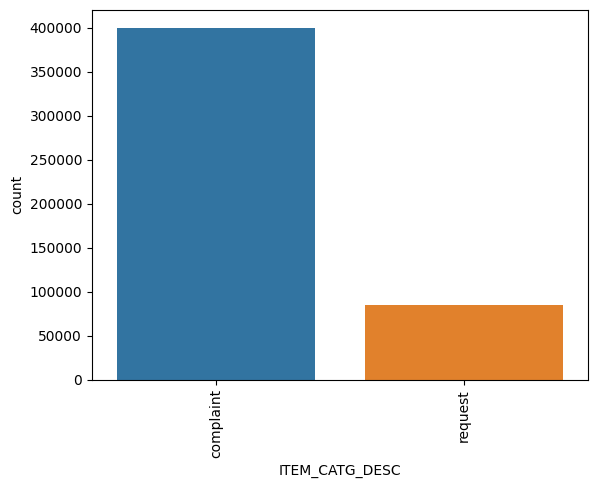

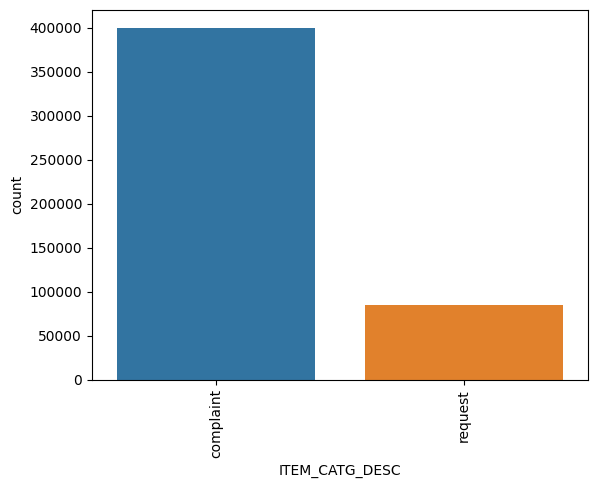


column_name --> ITEM_TYPE_DESC

unique_values before transformation	:  17
unique_values after transformation	:  17
covered_percent				:  1




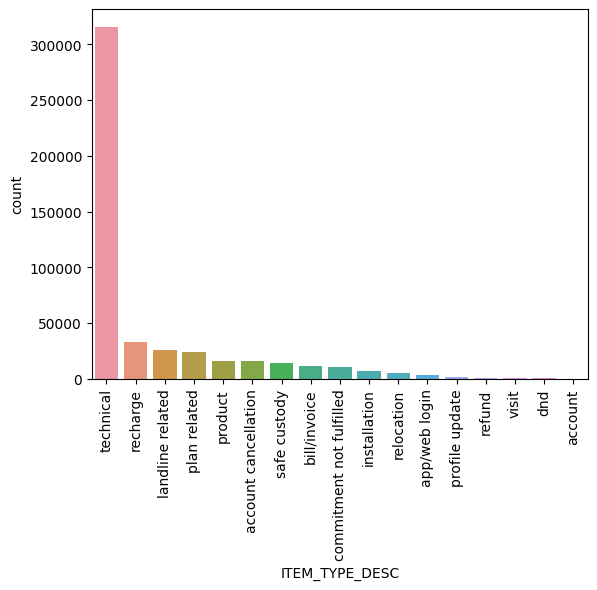

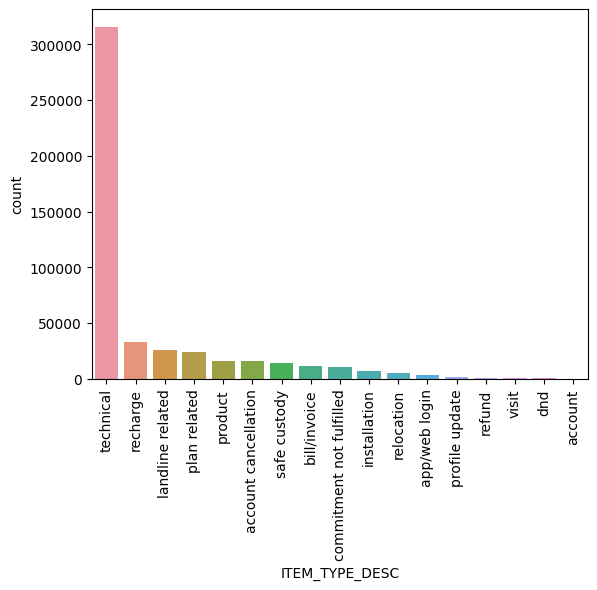


column_name --> ITEM_SUB_TYPE_DESC

unique_values before transformation	:  116
unique_values after transformation	:  32
covered_percent				:  0.902125167784543




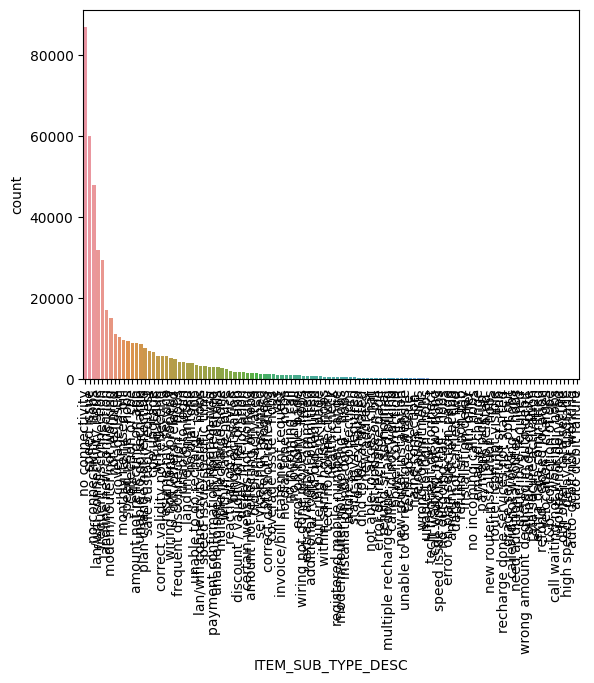

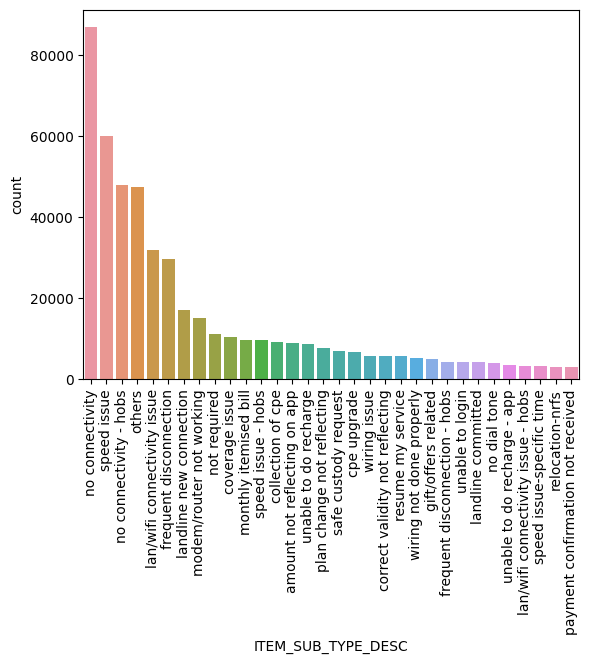


column_name --> ITEM_STATUS

unique_values before transformation	:  14
unique_values after transformation	:  14
covered_percent				:  1




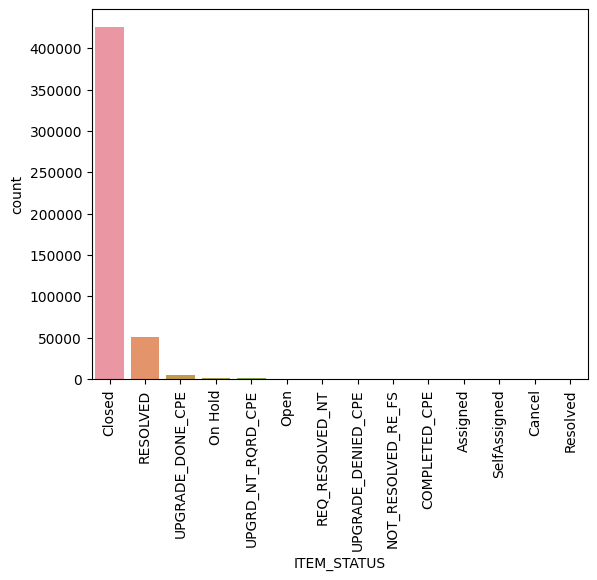

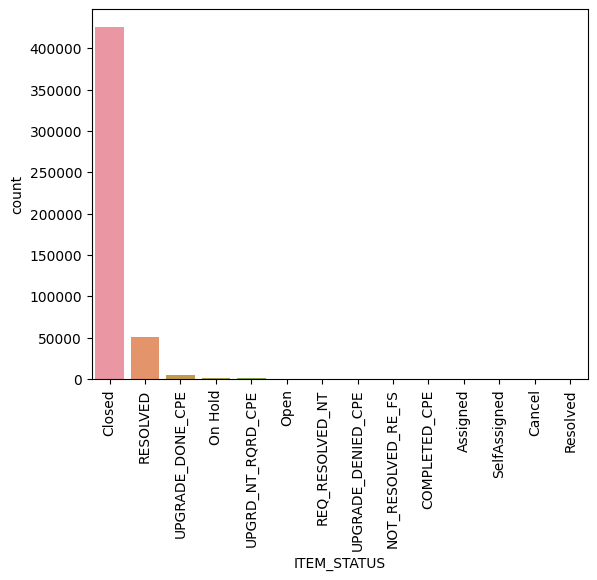


column_name --> ACTION

unique_values before transformation	:  27
unique_values after transformation	:  4
covered_percent				:  0.960521405287043




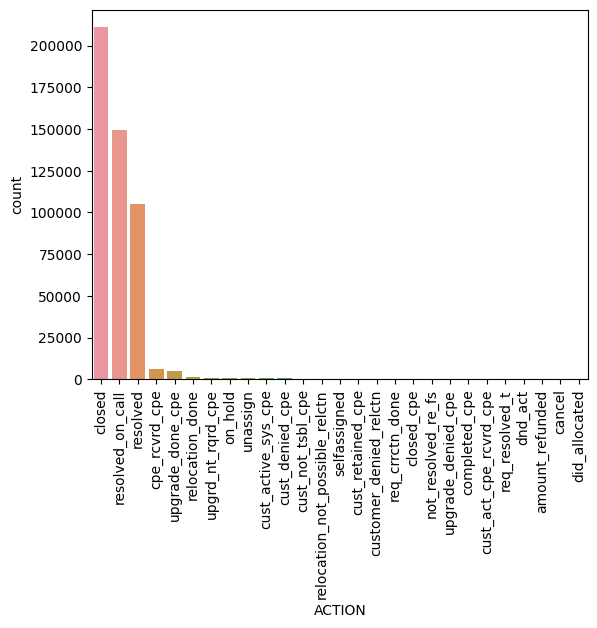

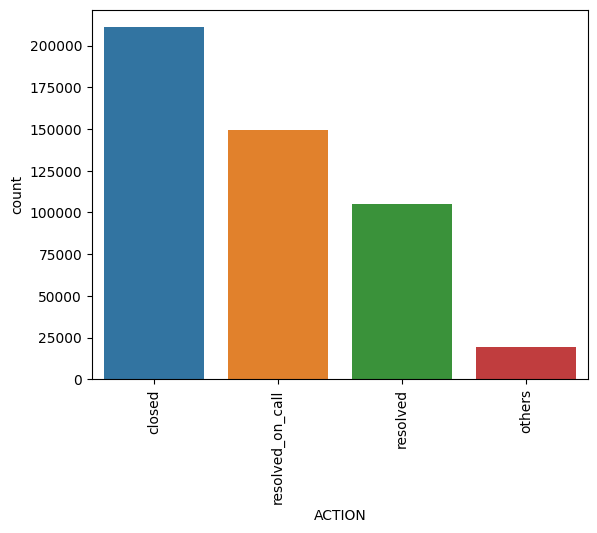


column_name --> ROOT_CAUSE_DESC

unique_values before transformation	:  181
unique_values after transformation	:  22
covered_percent				:  0.9023024884690009




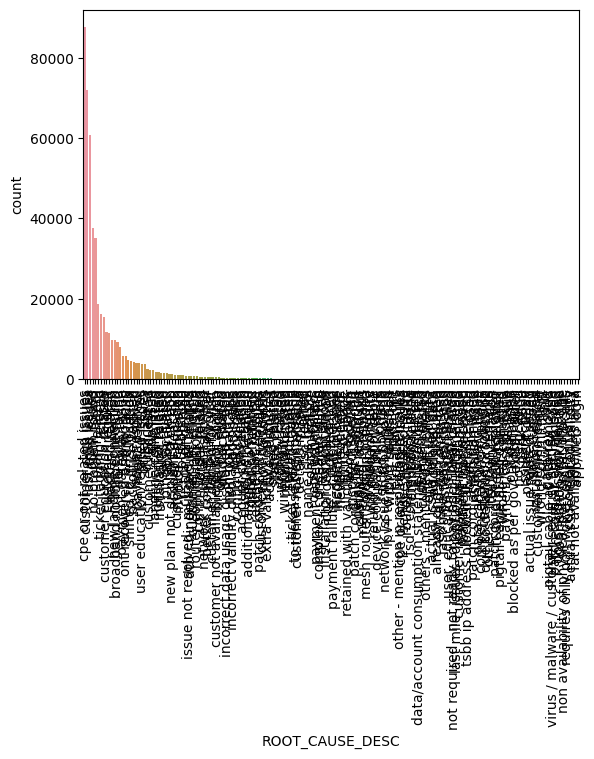

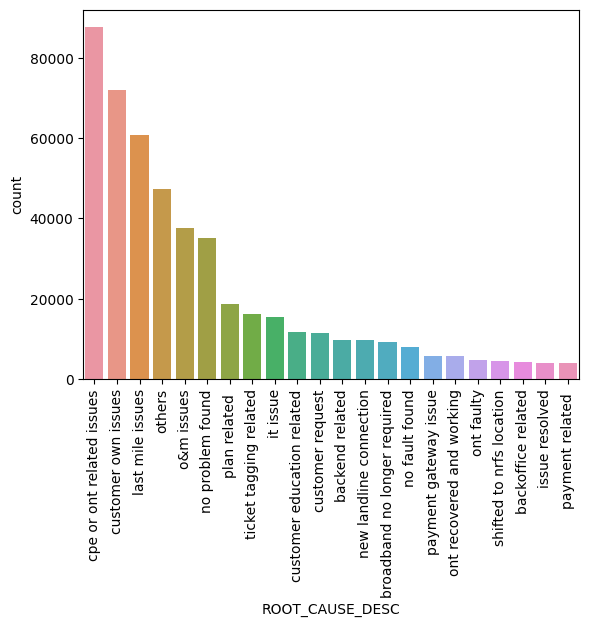


column_name --> REASON_CODE

unique_values before transformation	:  361
unique_values after transformation	:  61
covered_percent				:  0.9004447450190414




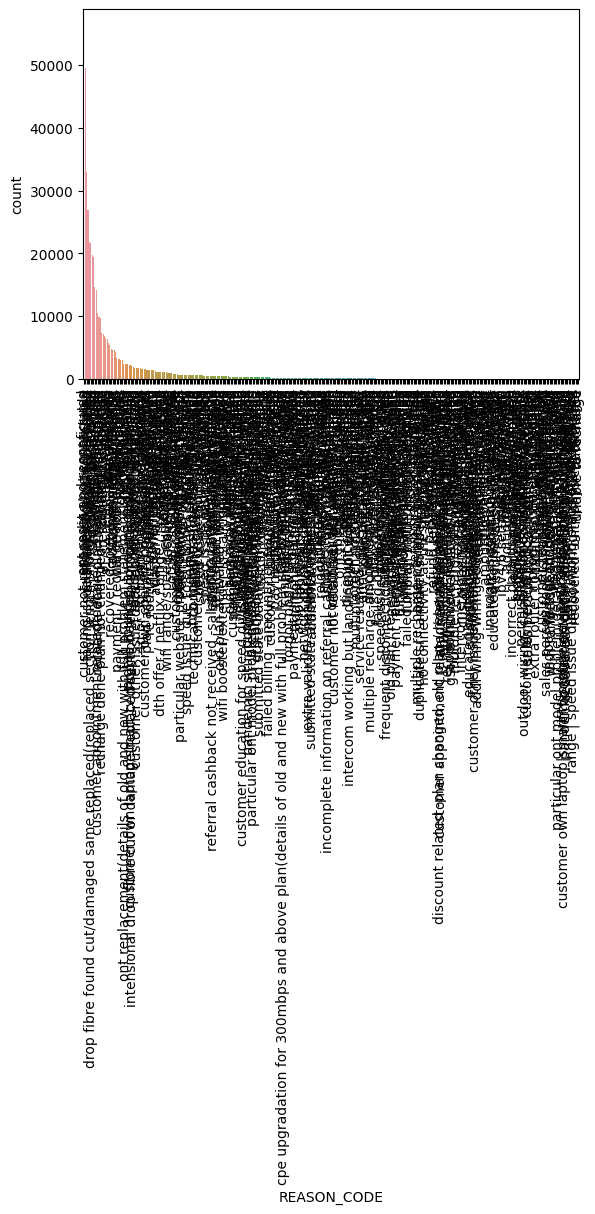

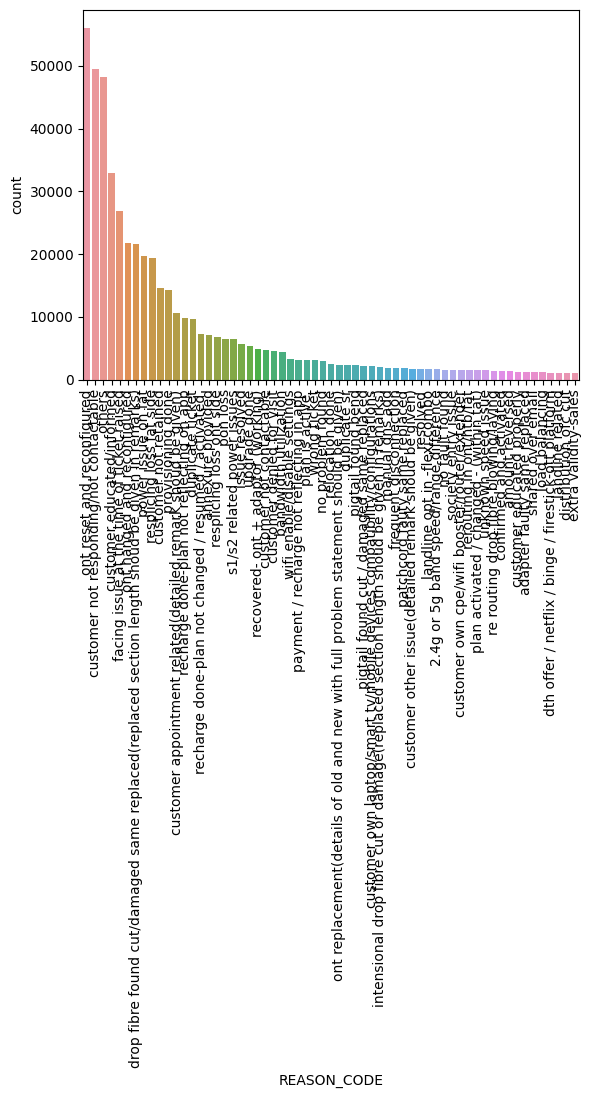

In [26]:
for col in cat_cols:
    
    covered_percent = 1
    
    if "others" in transformed_comp_data[col].unique():
        covered_percent = transformed_comp_data[col].value_counts().drop("others").sum()/transformed_comp_data[col].value_counts().sum()
    
    print("\ncolumn_name --> {}\n".format(col))
    print("unique_values before transformation\t: ", comp_df[col].nunique())
    print("unique_values after transformation\t: ", transformed_comp_data[col].nunique())
    print("covered_percent\t\t\t\t: ", covered_percent)
    
    print("\n")
    tt = pd.DataFrame(comp_df[col].value_counts()).reset_index()
    sub_status = sns.barplot(x=tt[col], y=tt["count"])
    sub_status.set_xticklabels(labels=tt[col], rotation=90)
    plt.show()
    
    tt = pd.DataFrame(transformed_comp_data[col].value_counts()).reset_index()
    sub_status = sns.barplot(x=tt[col], y=tt["count"])
    sub_status.set_xticklabels(labels=tt[col], rotation=90)
    plt.show()